In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.6 MB/s 
     |████████████████████████████████| 6.6 MB 47.3 MB/s 
     |████████████████████████████████| 120 kB 72.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [ ]:
df = pd.read_csv('/content/Reviews.csv')
df = df.head(5000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(5000, 10)

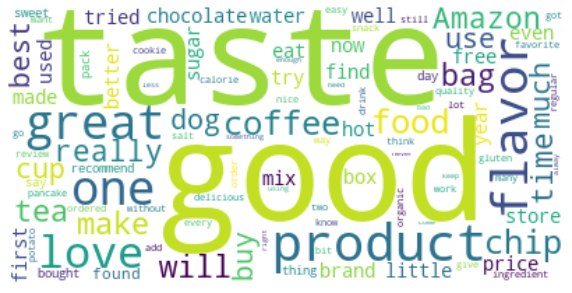

In [ ]:
from wordcloud import STOPWORDS
all_text = " ".join(df.Text)
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=100, stopwords=['br']+list(STOPWORDS)).generate(all_text)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

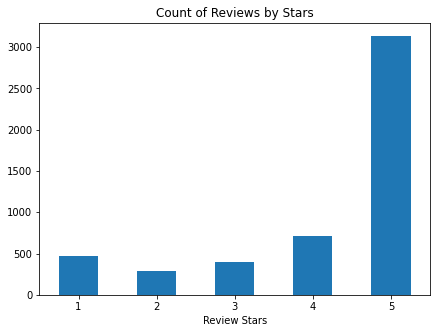

In [ ]:
# EDA
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar', title='Count of Reviews by Stars', figsize=(7,5)
)
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Text'].isna().sum()

0

In [ ]:
# How many 5 stars! Drop some 5 star rows!
df = df.sample(frac=1)
df_before = df.loc[(df['Score']!=5) & (df['Id']<3700),]
df_after = df.loc[df['Id']>=3700,]
df = pd.concat([df_before, df_after])
df = df.sample(frac=1)
df['Id'] = np.arange(0, len(df))
df = df.reset_index()
df = df.drop(columns=['index'])
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,B0009P68JI,A2RKR9HDFZSWZE,Charles R. Runzo,3,3,5,1249257600,MC CORMICKS ALFREDO SAUCE,THANKS TO AMAZON FOR CARRYING THIS WONDERFUL P...
1,1,B002X9JNYU,AVPSSODZIDABZ,HELfromBL,1,3,1,1323388800,what quantity is it!,I wouldn't even think of buying this product u...
2,2,B000B9SFP2,A1I4NHYX40MFD,C. Keeney,3,3,3,1310428800,Easy and portable...but a few issues,Although I think this pen is great...I didn't ...
3,3,B001L8DOFI,A1C8X2JEK3K1D4,MattBull,1,1,5,1338681600,Above user is wrong,Wagyu beef is a kobe beef Japanese cow crossbr...
4,4,B004WJAUBE,A2DYZJ8D7QD1KE,Debs,0,0,2,1327536000,"City Steam, not much steam in this brew.",My husband and I were very disappointed in thi...


In [ ]:
df.shape

(2682, 10)

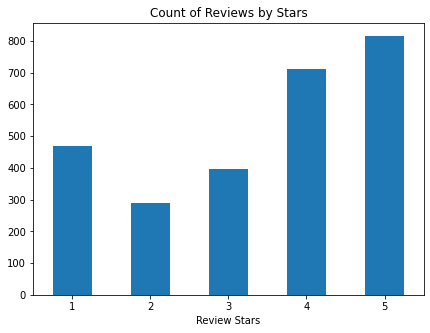

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar', title='Count of Reviews by Stars', figsize=(7,5)
)
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Basic NLTK
nltk.download('punkt')
example = df['Text'][50]
ex_tk = nltk.word_tokenize(example)
ex_tk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I',
 'have',
 'had',
 'the',
 'regular',
 'Donut',
 'House',
 'coffee',
 'before',
 'and',
 'enjoyed',
 'it',
 ',',
 'but',
 'I',
 'had',
 'never',
 'had',
 'the',
 'flavored',
 'kind',
 '.',
 'I',
 'was',
 'looking',
 'for',
 'a',
 'sampler',
 'pack',
 'to',
 'so',
 'my',
 'roommate',
 'and',
 'I',
 'could',
 'try',
 'the',
 'flavors',
 'as',
 'well',
 'as',
 'get',
 'some',
 'of',
 'the',
 'regular',
 'stuff',
 '.',
 'I',
 'do',
 "n't",
 'drink',
 'decaf',
 ',',
 'so',
 'I',
 'knew',
 'that',
 'some',
 'of',
 'this',
 'pack',
 'would',
 'not',
 'be',
 'used',
 '.',
 'I',
 'figured',
 'that',
 'the',
 'rest',
 'of',
 'the',
 'cups',
 'would',
 'make',
 'up',
 'for',
 'the',
 'loss',
 'on',
 'the',
 'decaf',
 '.',
 'I',
 'was',
 'wrong',
 '.',
 'This',
 '``',
 'Sampler',
 "''",
 'pack',
 'was',
 'a',
 'joke',
 '.',
 '18',
 'of',
 'the',
 'cups',
 'were',
 'decaf',
 ',',
 'and',
 '15',
 'of',
 'them',
 'were',
 'the',
 'standard',
 'house',
 'brew',
 '.',
 'I',
 'got',
 '1',
 'cup',
 

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(ex_tk)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('have', 'VBP'),
 ('had', 'VBD'),
 ('the', 'DT'),
 ('regular', 'JJ'),
 ('Donut', 'NNP'),
 ('House', 'NNP'),
 ('coffee', 'NN'),
 ('before', 'IN'),
 ('and', 'CC'),
 ('enjoyed', 'VBD'),
 ('it', 'PRP'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('never', 'RB'),
 ('had', 'VBD'),
 ('the', 'DT'),
 ('flavored', 'VBN'),
 ('kind', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('sampler', 'NN'),
 ('pack', 'NN'),
 ('to', 'TO'),
 ('so', 'VB'),
 ('my', 'PRP$'),
 ('roommate', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('could', 'MD'),
 ('try', 'VB'),
 ('the', 'DT'),
 ('flavors', 'NNS'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('as', 'IN'),
 ('get', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('regular', 'JJ'),
 ('stuff', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('decaf', 'NN'),
 (',', ','),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('knew', 'VBD'),
 ('that', 'IN'),
 ('some'

In [ ]:
# VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [ ]:
nltk.download('vader_lexicon')
my_sia = SentimentIntensityAnalyzer()
my_sia.polarity_scores(df['Text'][50])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.041, 'neu': 0.883, 'pos': 0.077, 'compound': 0.7405}

In [ ]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    my_id = row['Id']
    score = my_sia.polarity_scores(text)
    result[my_id] = score

100%|██████████| 2682/2682 [00:02<00:00, 1034.55it/s]


In [ ]:
result_df = pd.DataFrame(result).T
result_df.head()

,neg,neu,pos,compound
0,0.020,0.718,0.262,0.9892
1,0.000,1.000,0.000,0.0000
2,0.049,0.871,0.080,0.9759
3,0.000,0.778,0.222,0.7978
4,0.354,0.566,0.079,-0.8067


In [ ]:
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.020,0.718,0.262,0.9892,B0009P68JI,A2RKR9HDFZSWZE,Charles R. Runzo,3,3,5,1249257600,MC CORMICKS ALFREDO SAUCE,THANKS TO AMAZON FOR CARRYING THIS WONDERFUL P...
1,1,0.000,1.000,0.000,0.0000,B002X9JNYU,AVPSSODZIDABZ,HELfromBL,1,3,1,1323388800,what quantity is it!,I wouldn't even think of buying this product u...
2,2,0.049,0.871,0.080,0.9759,B000B9SFP2,A1I4NHYX40MFD,C. Keeney,3,3,3,1310428800,Easy and portable...but a few issues,Although I think this pen is great...I didn't ...
3,3,0.000,0.778,0.222,0.7978,B001L8DOFI,A1C8X2JEK3K1D4,MattBull,1,1,5,1338681600,Above user is wrong,Wagyu beef is a kobe beef Japanese cow crossbr...
4,4,0.354,0.566,0.079,-0.8067,B004WJAUBE,A2DYZJ8D7QD1KE,Debs,0,0,2,1327536000,"City Steam, not much steam in this brew.",My husband and I were very disappointed in thi...


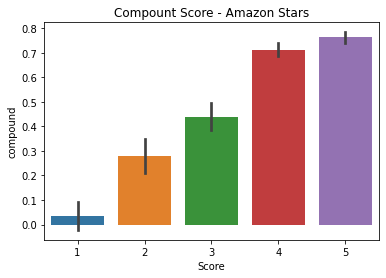

In [ ]:
sns.barplot(x=result_df['Score'], y=result_df['compound'])
plt.title('Compount Score - Amazon Stars')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=result_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=result_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=result_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
# Roberta Pre-trained Model
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokens = AutoTokenizer.from_pretrained(model)
my_model = TFAutoModelForSequenceClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

NameError: ignored

In [ ]:
# Remove all 3 star reviews because 3 star is considered as neutral
df_new = pd.read_csv("/content/Reviews.csv")
df_new = df_new.loc[df_new['Score']!=3]
df_new = df_new.head(10000)
df_new.Score.value_counts()

5    6776
4    1545
1    1033
2     646
Name: Score, dtype: int64

In [ ]:
df_new = df_new.sample(frac=1)
df_new_before = df_new.loc[(df_new['Score']<4) & (df_new['Id']<8000),]
df_new_after = df_new.loc[df_new['Id']>=8000,]
df_new = pd.concat([df_new_before, df_new_after])
df_new = df_new.sample(frac=1)
df_new['Id'] = np.arange(0, len(df_new))
df_new = df_new.reset_index()
df_new = df_new.drop(columns=['index'])
df_new.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,B003VXFK44,A1PMJ9FR4X1CP4,Mare17,2,2,5,1332892800,Best K-cup Coffee!,I bought the Kuerig because I love the Dunkin ...
1,1,B001HTJEZ0,AOICA05J2T6ZQ,leemaui,3,11,1,1282780800,You've got to be kidding!,"The ""reviewer from Florida"" was being extremel..."
2,2,B0029NVMXA,A2SLZMD0UYRT5X,cat's food,0,0,5,1323993600,They like em'....they like em'.,My finicky cats are difficult to please partic...
3,3,B000UBDKII,A1OKMWKTNUJ6L2,"Bridget Young ""YoungMomof2""",0,0,4,1205625600,Wonderful aroma - flavor needs to be stronger.,"Overall, this makes a great fast cup of coffee..."
4,4,B007WFQ4EM,A3GRR3EKLYS5PP,David Martin,1,1,5,1344297600,Awesome,I was at a Walmart in South Carolina and just ...


In [ ]:
df_new['Score'].value_counts().sort_index(ascending=False)

5    1779
4     414
2     646
1    1033
Name: Score, dtype: int64

In [ ]:
# Recurrent Neural Network
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
df = df_new
df['label'] = (df['Score']>=4).astype(int)
df2 = df[['label', 'Text']]
print(df2.head())

   label                                               Text
0      1  I bought the Kuerig because I love the Dunkin ...
1      0  The "reviewer from Florida" was being extremel...
2      1  My finicky cats are difficult to please partic...
3      1  Overall, this makes a great fast cup of coffee...
4      1  I was at a Walmart in South Carolina and just ...


In [ ]:
df2['label'].value_counts()

1    2193
0    1679
Name: label, dtype: int64

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ') # num_words: the number of mosst frequent words returned.
tokenizer.fit_on_texts(df2['Text'].values)
encoded_docs = tokenizer.texts_to_sequences(df2['Text'].values)
X = pad_sequences(encoded_docs, maxlen = 1000) # maxlen: the mex length of sequence(vector) in this matrix.
X.shape

(3872, 1000)

In [ ]:
y = df2['label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3872,)
(3097, 1000) (3097,) (775, 1000) (775,)


In [ ]:
model = tf.keras.Sequential()
model.add(Embedding(1000, 64, input_length = X.shape[1]))
model.add(LSTM(176, dropout=0.4, recurrent_dropout=0.4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 176)               169664    
                                                                 
 dropout_38 (Dropout)        (None, 176)               0         
                                                                 
 dense (Dense)               (None, 32)                5664      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 239,361
Trainable params: 239,361
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
batch_size=128
history = model.fit(X_train, y_train, epochs=13, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/13
25/25 [==============================] - 113s 4s/step - loss: 0.6684 - accuracy: 0.5689 - val_loss: 0.5724 - val_accuracy: 0.7174
Epoch 2/13
25/25 [==============================] - 109s 4s/step - loss: 0.4608 - accuracy: 0.7940 - val_loss: 0.4726 - val_accuracy: 0.7974
Epoch 3/13
25/25 [==============================] - 109s 4s/step - loss: 0.3816 - accuracy: 0.8418 - val_loss: 0.4407 - val_accuracy: 0.7923
Epoch 4/13
25/25 [==============================] - 109s 4s/step - loss: 0.3275 - accuracy: 0.8644 - val_loss: 0.4069 - val_accuracy: 0.8258
Epoch 5/13
25/25 [==============================] - 120s 5s/step - loss: 0.2553 - accuracy: 0.8980 - val_loss: 0.4496 - val_accuracy: 0.8026
Epoch 6/13
25/25 [==============================] - 110s 4s/step - loss: 0.2464 - accuracy: 0.9044 - val_loss: 0.4376 - val_accuracy: 0.8206
Epoch 7/13
25/25 [==============================] - 109s 4s/step - loss: 0.2770 - accuracy: 0.8899 - val_loss: 0.4907 - val_accuracy: 0.7819
Epoch 8/13
25

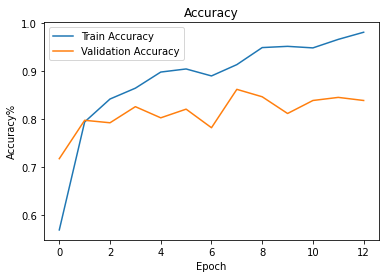

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy%')
plt.legend()
plt.show()

In [ ]:
def anal_sent(my_text, my_model, my_tokenizer):
  encoded_text = my_tokenizer.texts_to_sequences(my_text)
  X = pad_sequences(encoded_text, maxlen = 1000)
  return (my_model.predict(X))

In [ ]:
ex_review0 = ["Nice but just a little bit pricy"]
print(anal_sent(ex_review0, model, tokenizer))

[[0.9952201]]


In [ ]:
ex_review1 = ["I bought it for my son and he says he likes it."]
print(anal_sent(ex_review1, model, tokenizer))

[[0.9849193]]


In [ ]:
ex_review2 = ["It actually tastes better than I expected."]
print(anal_sent(ex_review2, model, tokenizer))

[[0.20806265]]


In [ ]:
ex_review3 = ["It tastes too sour. Not recommended!"]
print(anal_sent(ex_review3, model, tokenizer))

[[0.00289819]]


In [ ]:
ex_review4 = ["Even the dogs wouldn't eat it! Half star if I could."]
print(anal_sent(ex_review4, model, tokenizer))

[[0.0001295]]


In [ ]:
ex_review5 = ['This is too salty and has strange after taste, so I am not sure about whether it has artificial additives? I threw it all away after tasting just one slice!']
print(anal_sent(ex_review5, model, tokenizer))

[[4.113077e-05]]


In [ ]:
ex_review6 = ["Bought it for my husband. He loved it. Will re-order more."]
print(anal_sent(ex_review6, model, tokenizer))

[[0.9999999]]


In [ ]:
ex_review7 = ["Came with 4 peices all the same size. Wasnt as wet and juicy as the beef jerky but still good. Will definitely buy again. Only negative is because i don't live near the store front lol."]
print(anal_sent(ex_review7, model, tokenizer))

[[0.12580383]]


In [ ]:
ex_review8 = ["Absolutely loving this. Reminds me of home. Very glad that the product like this is being sold in the states."]
print(anal_sent(ex_review8, model, tokenizer))

[[0.10297598]]


In [ ]:
ex_review9 = ["Good quality, good taste, a must-have snack while watching TV."]
print(anal_sent(ex_review9, model, tokenizer))

[[0.9999924]]


In [ ]:
ex_review10 = ["Excellent taste, great chew, fast service, somewhat expensive"]
print(anal_sent(ex_review10, model, tokenizer))

[[0.9999522]]


In [ ]:
ex_review11 = ["I do not like the texture. They’re too hard to chew, I’m from Thailand and know how they should taste."]
print(anal_sent(ex_review11, model, tokenizer))

[[4.6042005e-05]]
